In [1]:
##### Importing Relevant Libraries ######
#########################################

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler              ## (x-mean(variable))/standard_deviation(variable)
from sklearn.model_selection import StratifiedShuffleSplit    ## for datasplitting
 
from sklearn.model_selection import GridSearchCV              ## for hyperparameter finding
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, plot_roc_curve, confusion_matrix,f1_score         ## model evaluation metrics
from sklearn.tree import DecisionTreeClassifier          ## helps fitting a decision tree

In [2]:
data = pd.read_excel('Churn.xlsx')

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Preparation

In [4]:
pd.set_option('display.max_rows', 11000)
data.nunique()    ## checking number of unique values of all columns

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

In [5]:
data['customerID'].duplicated().sum()  ## cheking for duplicate records

0

In [6]:
data = data.drop(data[['customerID']], axis=1)             ## customerID is a nominal column and has no duplicate values so we can drop it

In [7]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [9]:
data.isnull().sum()    ## checking for null values in all columns

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
##***************** gender column *********************

data['gender'].value_counts() 

Male      3555
Female    3488
Name: gender, dtype: int64

In [11]:
## creating dummies ,deleting the column and merging dummies dataframe with main (data) dataframe

dummiesgen = pd.get_dummies(data['gender'], prefix='gender')
del data['gender']
data = pd.concat([data,dummiesgen],axis=1)

In [12]:
## ************ Partner column *******************

data['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [13]:
## creating dummies ,deleting the column and merging dummies dataframe with main (data) dataframe

dummiesPartner = pd.get_dummies(data['Partner'], prefix='Partner')
del data['Partner']
data = pd.concat([data,dummiesPartner],axis=1)

In [14]:
## ***************** Dependents ********************

data['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

In [15]:
## creating dummies ,deleting the column and merging dummies dataframe with main (data) dataframe

dummiesdep = pd.get_dummies(data['Dependents'], prefix='Dependents')
del data['Dependents']
data = pd.concat([data,dummiesdep],axis=1)

In [16]:
## ****************** PhoneService column *****************

data['PhoneService'].value_counts()  

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [17]:
## creating dummies ,deleting the column and merging dummies dataframe with main (data) dataframe

dummiesps = pd.get_dummies(data['PhoneService'], prefix='PhoneService')
del data['PhoneService']
data = pd.concat([data,dummiesps],axis=1)

In [18]:
##******************** MultipleLines column************************

data['MultipleLines'].value_counts() 

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [19]:
dummiesml = pd.get_dummies(data['MultipleLines'], prefix='MultipleLines', drop_first=True)
del data['MultipleLines']
data = pd.concat([data,dummiesml],axis=1)

In [20]:
##*********** InternetService column *********************

data['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [21]:
dummiesis = pd.get_dummies(data['InternetService'], prefix='InternetService',drop_first=True)
del data['InternetService']
data = pd.concat([data,dummiesis],axis=1)

In [22]:
data.dtypes    ## checking data types

SeniorCitizen                       int64
tenure                              int64
OnlineSecurity                     object
OnlineBackup                       object
DeviceProtection                   object
TechSupport                        object
StreamingTV                        object
StreamingMovies                    object
Contract                           object
PaperlessBilling                   object
PaymentMethod                      object
MonthlyCharges                    float64
TotalCharges                      float64
Churn                              object
gender_Female                       uint8
gender_Male                         uint8
Partner_No                          uint8
Partner_Yes                         uint8
Dependents_No                       uint8
Dependents_Yes                      uint8
PhoneService_No                     uint8
PhoneService_Yes                    uint8
MultipleLines_No phone service      uint8
MultipleLines_Yes                 

In [23]:
##***********************OnlineSecurity  *********************

data['OnlineSecurity'].value_counts() 

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [24]:
## creating dummies ,deleting the column and merging dummies dataframe with main (data) dataframe

dummiesos = pd.get_dummies(data['OnlineSecurity'], prefix='OnlineSecurity',drop_first=True)
del data['OnlineSecurity']
data = pd.concat([data,dummiesos],axis=1)

In [25]:
##************************* OnlineBackup ***********************

data['OnlineBackup'].value_counts() 

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [26]:
## creating dummies ,deleting the column and merging dummies dataframe with main (data) dataframe

dummiesob = pd.get_dummies(data['OnlineBackup'], prefix='OnlineBackup',drop_first=True)
del data['OnlineBackup']
data = pd.concat([data,dummiesob],axis=1)

In [27]:
data.dtypes

SeniorCitizen                           int64
tenure                                  int64
DeviceProtection                       object
TechSupport                            object
StreamingTV                            object
StreamingMovies                        object
Contract                               object
PaperlessBilling                       object
PaymentMethod                          object
MonthlyCharges                        float64
TotalCharges                          float64
Churn                                  object
gender_Female                           uint8
gender_Male                             uint8
Partner_No                              uint8
Partner_Yes                             uint8
Dependents_No                           uint8
Dependents_Yes                          uint8
PhoneService_No                         uint8
PhoneService_Yes                        uint8
MultipleLines_No phone service          uint8
MultipleLines_Yes                 

In [28]:
##*********************** DeviceProtection column *************************************

data['DeviceProtection'].value_counts() 

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

In [29]:
## creating dummies ,deleting the column and merging dummies dataframe with main (data) dataframe

dummiesdp = pd.get_dummies(data['DeviceProtection'], prefix='DeviceProtection',drop_first=True)
del data['DeviceProtection']
data = pd.concat([data,dummiesdp],axis=1)

In [30]:
##******************* TechSupport column ***********************

data['TechSupport'].value_counts() 

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

In [31]:
## creating dummies ,deleting the column and merging dummies dataframe with main (data) dataframe

dummiests = pd.get_dummies(data['TechSupport'], prefix='TechSupport',drop_first=True)
del data['TechSupport']
data = pd.concat([data,dummiests],axis=1)

In [32]:
##******************* StreamingTV column ***********************

data['StreamingTV'].value_counts() 

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

In [33]:
## creating dummies ,deleting the column and merging dummies dataframe with main (data) dataframe

dummiesstv = pd.get_dummies(data['StreamingTV'], prefix='StreamingTV',drop_first=True)
del data['StreamingTV']
data = pd.concat([data,dummiesstv],axis=1)

In [34]:
##******************* StreamingMovies column ***********************

data['StreamingMovies'].value_counts() 

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

In [35]:
## creating dummies ,deleting the column and merging dummies dataframe with main (data) dataframe

dummiesms = pd.get_dummies(data['StreamingMovies'], prefix='StreamingMovies',drop_first=True)
del data['StreamingMovies']
data = pd.concat([data,dummiesms],axis=1)

In [36]:
##******************* Contract column ***********************

data['Contract'].value_counts() 

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [37]:
## creating dummies ,deleting the column and merging dummies dataframe with main (data) dataframe

dummiescon = pd.get_dummies(data['Contract'], prefix='Contract')
del data['Contract']
data = pd.concat([data,dummiescon],axis=1)

In [38]:
##******************* PaperlessBilling column ***********************

data['PaperlessBilling'].value_counts() 

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

In [39]:
## creating dummies ,deleting the column and merging dummies dataframe with main (data) dataframe

dummiespb = pd.get_dummies(data['PaperlessBilling'], prefix='PaperlessBilling')
del data['PaperlessBilling']
data = pd.concat([data,dummiespb],axis=1)

In [40]:
##******************* PaymentMethod column ***********************

data['PaymentMethod'].value_counts() 

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [41]:
## creating dummies ,deleting the column and merging dummies dataframe with main (data) dataframe

dummiespmt = pd.get_dummies(data['PaymentMethod'], prefix='PaymentMethod',drop_first=True)
del data['PaymentMethod']
data = pd.concat([data,dummiespmt],axis=1)

In [42]:
##*************** TotalCharges column *****************************

data['TotalCharges'].isnull().sum(), data['TotalCharges'].mean(), data['TotalCharges'].median()

(11, 2283.3004408418697, 1397.475)

In [43]:
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].median())

In [44]:
## *************** married, vehicle_ownership, children, outcome colmns ******************************
## importing labelencoder from sklearn library

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [45]:
## encoding boolean values as True as 1 and False as 0

data['Churn'] = le.fit_transform(data['Churn'])  

In [46]:
data.dtypes, data.isnull().sum()

(SeniorCitizen                              int64
 tenure                                     int64
 MonthlyCharges                           float64
 TotalCharges                             float64
 Churn                                      int64
 gender_Female                              uint8
 gender_Male                                uint8
 Partner_No                                 uint8
 Partner_Yes                                uint8
 Dependents_No                              uint8
 Dependents_Yes                             uint8
 PhoneService_No                            uint8
 PhoneService_Yes                           uint8
 MultipleLines_No phone service             uint8
 MultipleLines_Yes                          uint8
 InternetService_Fiber optic                uint8
 InternetService_No                         uint8
 OnlineSecurity_No internet service         uint8
 OnlineSecurity_Yes                         uint8
 OnlineBackup_No internet service           uint8


In [47]:
data.corr()  ## checking correlation

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
SeniorCitizen,1.000000,0.016567,0.220173,0.102652,0.150889,0.001874,-0.001874,-0.016479,0.016479,0.211185,-0.211185,-0.008576,0.008576,-0.008576,0.142948,0.255338,-0.182742,-0.182742,-0.038653,-0.182742,0.066572,-0.182742,0.059428,-0.182742,-0.060625,-0.182742,0.105378,-0.182742,0.120176,0.138360,-0.046262,-0.117000,-0.156530,0.156530,-0.024135,0.171718,-0.153477
tenure,0.016567,1.000000,0.247900,0.825464,-0.352229,-0.005106,0.005106,-0.379697,0.379697,-0.159712,0.159712,-0.008448,0.008448,-0.008448,0.331941,0.019720,-0.039062,-0.039062,0.327203,-0.039062,0.360277,-0.039062,0.360653,-0.039062,0.324221,-0.039062,0.279756,-0.039062,0.286111,-0.645561,0.202570,0.558533,-0.006152,0.006152,0.233006,-0.208363,-0.233852
MonthlyCharges,0.220173,0.247900,1.000000,0.650864,0.193356,0.014569,-0.014569,-0.096848,0.096848,0.113890,-0.113890,-0.247398,0.247398,-0.247398,0.490434,0.787066,-0.763557,-0.763557,0.296594,-0.763557,0.441780,-0.763557,0.482692,-0.763557,0.338304,-0.763557,0.629603,-0.763557,0.627429,0.060165,0.004904,-0.074681,-0.352150,0.352150,0.030550,0.271625,-0.377437
TotalCharges,0.102652,0.825464,0.650864,1.000000,-0.199037,0.000002,-0.000002,-0.318364,0.318364,-0.063593,0.063593,-0.113013,0.113013,-0.113013,0.468705,0.361045,-0.374706,-0.374706,0.412091,-0.374706,0.509607,-0.374706,0.522374,-0.374706,0.432329,-0.374706,0.515279,-0.374706,0.519884,-0.445619,0.170649,0.356226,-0.158055,0.158055,0.182745,-0.059971,-0.294814
Churn,0.150889,-0.352229,0.193356,-0.199037,1.000000,0.008612,-0.008612,0.150448,-0.150448,0.164221,-0.164221,-0.011942,0.011942,-0.011942,0.040102,0.308020,-0.227890,-0.227890,-0.171226,-0.227890,-0.082255,-0.227890,-0.066160,-0.227890,-0.164674,-0.227890,0.063228,-0.227890,0.061382,0.405103,-0.177820,-0.302253,-0.191825,0.191825,-0.134302,0.301919,-0.091683
gender_Female,0.001874,-0.005106,0.014569,0.000002,0.008612,1.000000,-1.000000,-0.001808,0.001808,0.010517,-0.010517,-0.006488,0.006488,-0.006488,0.008414,0.011286,-0.006026,-0.006026,0.017021,-0.006026,0.013773,-0.006026,0.002105,-0.006026,0.009212,-0.006026,0.008393,-0.006026,0.010487,0.003386,-0.008026,0.003695,-0.011754,0.011754,-0.001215,-0.000752,-0.013744
gender_Male,-0.001874,0.005106,-0.014569,-0.000002,-0.008612,-1.000000,1.000000,0.001808,-0.001808,-0.010517,0.010517,0.006488,-0.006488,0.006488,-0.008414,-0.011286,0.006026,0.006026,-0.017021,0.006026,-0.013773,0.006026,-0.002105,0.006026,-0.009212,0.006026,-0.008393,0.006026,-0.010487,-0.003386,0.008026,-0.003695,0.011754,-0.011754,0.001215,0.000752,0.013744
Partner_No,-0.016479,-0.379697,-0.096848,-0.318364,0.150448,-0.001808,0.001808,1.000000,-1.000000,0.452676,-0.452676,0.017706,-0.017706,0.017706,-0.142057,-0.000304,-0.000615,-0.000615,-0.143106,-0.000615,-0.141498,-0.000615,-0.153786,-0.000615,-0.119999,-0.000615,-0.124666,-0.000615,-0.117412,0.280865,-0.082783,-0.248091,-0.014877,0.014877,-0.082029,0.083852,0.095125
Partner_Yes,0.016479,0.379697,0.096848,0.318364,-0.150448,0.001808,-0.001808,-1.000000,1.000000,-0.452676,0.452676,-0.017706,0.017706,-0.017706,0.142057,0.000304,0.000615,0.000615,0.143106,0.000615,0.141498,0.000615,0.153786,0.000615,0.119999,0.000615,0.124666,0.000615,0.117412,-0.280865,0.082783,0.248091,0.014877

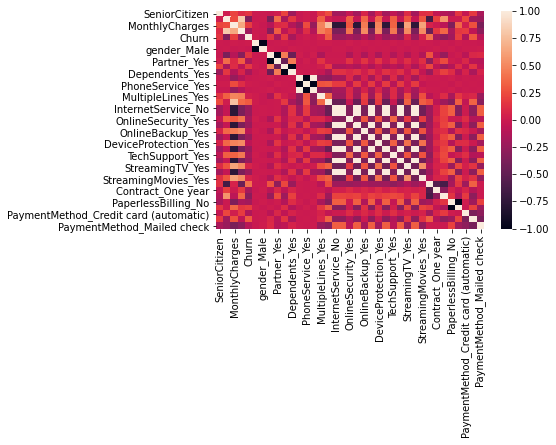

In [48]:
import seaborn as sns
sns.heatmap(data.corr())    ##plotting correlation matrix

In [49]:
data.shape

(7043, 37)

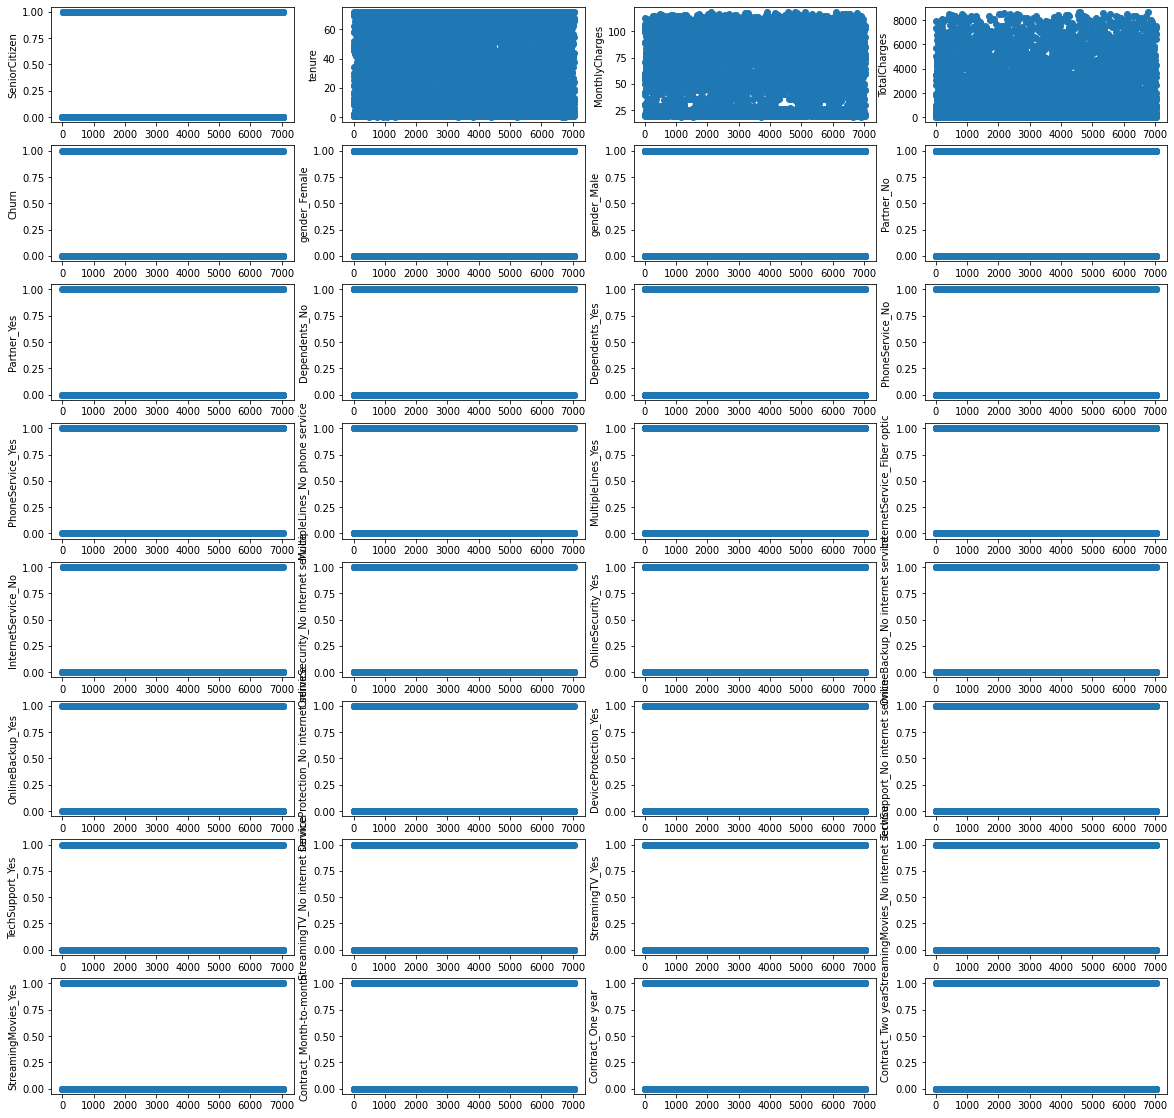

In [50]:
#### Visualizing numeric columns ######

numeric_cols = data.select_dtypes(include = np.number) ### selects numeric columns

column_names = list(numeric_cols.columns)

col_index = 0

plot_rows = 8
plot_cols = 4

fig, ax = plt.subplots(nrows = plot_rows,ncols=plot_cols,figsize = (20,20))

for row_count in range(plot_rows):
    for col_count in range(plot_cols):
        ax[row_count][col_count].scatter(y = numeric_cols[column_names[col_index]],x=numeric_cols.index)
        ax[row_count][col_count].set_ylabel(column_names[col_index])
        col_index = col_index + 1

In [51]:
data.shape

(7043, 37)

In [52]:
## scaling down the values because some columns are having high range of values
scaler = StandardScaler() 

scaler.fit(data[['tenure','MonthlyCharges','TotalCharges']]) ### it will compute mean and standard deviation of every column

data[['tenure','MonthlyCharges','TotalCharges']] = scaler.transform(data[['tenure','MonthlyCharges','TotalCharges']])  ## transforming and reassigning names of columns

In [53]:
data.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,-1.277445,-1.160323,-0.994242,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
1,0,0.066327,-0.259629,-0.173244,0,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1
2,0,-1.236724,-0.362660,-0.959674,1,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
3,0,0.514251,-0.746535,-0.194766,0,0,1,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0
4,0,-1.236724,0.197365,-0.940470,1,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0


# Model Data Preparation

In [54]:
features = data.drop(['Churn'],axis=1)   ## dropping target column and storing all features in features variable
target = data['Churn']                   ## selecting only target column (outcome) and storing in target variable

In [55]:
features.shape, target.shape

((7043, 36), (7043,))

In [56]:
4000/7043, 3043/7043

(0.5679397983813715, 0.4320602016186284)

In [57]:
target.value_counts()   ## imbalanced dataset

0    5174
1    1869
Name: Churn, dtype: int64

In [58]:
##### Creating a test set to validate the model on ######

split_size = 0.4320602016186284

split_ins = StratifiedShuffleSplit(n_splits=1, test_size=split_size, random_state=1000)

splits = split_ins.split(features,target)

for train_index, test_index in splits:
    xtrain = features.iloc[train_index,:]   ## features for the training set
    ytrain = target[train_index]            ## target values for the training set
    xval = features.iloc[test_index,:]      ## features for the validation set
    yval = target[test_index]               ## targets for the validation set

In [59]:
xtrain.shape, ytrain.shape, xval.shape, yval.shape

((4000, 36), (4000,), (3043, 36), (3043,))

# Logistic Regression Model

In [60]:
LR_model = LogisticRegression(penalty ='l2' ,class_weight = 'balanced',max_iter=200,random_state=1000)

In [61]:
LR_model.fit(xtrain,ytrain)                  ##training the model

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=200, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1000, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
prediction_train = LR_model.predict_proba(xtrain)                 ## applies a threshold of 0.5

[[2159  780]
 [ 207  854]]
The F1-SCORE on the train set prediction  0.8919060052219322


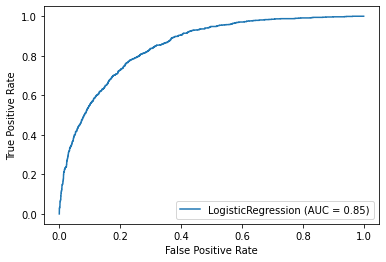

In [63]:
print(confusion_matrix(y_true = ytrain, y_pred = LR_model.predict(xtrain)))                  ##confusion matrix for pred on train set

print ('The F1-SCORE on the train set prediction ',f1_score(y_true=ytrain,y_pred = LR_model.predict(xtrain),sample_weight = ytrain))   ## calculating F score
plot_roc_curve(LR_model,X =xtrain, y= ytrain)  ## plotting roc and auc curve

In [64]:
##******************** validation set **********************************
predictionval = LR_model.predict_proba(xval) ### applies a threshold of 0.5

[[1588  647]
 [ 162  646]]
The F1-SCORE on the validation set prediction  0.8885832187070152


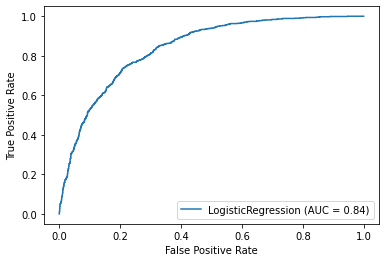

In [65]:
print(confusion_matrix(y_true = yval, y_pred = LR_model.predict(xval)))          ## confusion matrix for pred on validation set

print ('The F1-SCORE on the validation set prediction ',f1_score(y_true=yval,y_pred = LR_model.predict(xval),sample_weight = yval))   ## calculating F score
plot_roc_curve(LR_model,X =xval, y= yval)         ## plotting roc and auc curve 

# Decision Tree Model

In [66]:
clf = DecisionTreeClassifier()

params={'class_weight':['balanced'], 
        'max_features' : [1,5],
        'max_depth' : [6,7,8,9,10],
        'criterion' :['gini','entropy'],
        'min_samples_split' : [2,5,10,20]}

In [67]:
##### Fitting grid search cv to find the best combination of hyper parameters ####

grid_search = GridSearchCV(estimator = clf,param_grid = params,cv = 5,scoring = 'f1', return_train_score=True)

grid_search.fit(xtrain,ytrain)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'class_weight': ['balanced'],
                       

In [68]:
grid_search.best_estimator_   ## shows best set of parameter

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=6, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [69]:
clf = grid_search.best_estimator_

In [70]:
clf.fit(xtrain,ytrain)   ## fitting with best set of parameters given by gridsearchcv

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=6, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[[2094  845]
 [ 197  864]]
The F1-SCORE on the train set prediction  0.8976623376623376


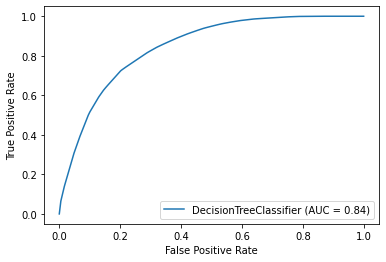

In [71]:
## Evaluating model on train set

predicted_train = clf.predict(xtrain)      # prediction on train set

plot_roc_curve(clf,X =xtrain, y= ytrain)     # roc and auc curve

print(confusion_matrix(y_true = ytrain, y_pred = predicted_train))   # printing confusion matrix

print ('The F1-SCORE on the train set prediction ',f1_score(y_true=ytrain,y_pred = predicted_train,sample_weight = ytrain))  # calculating F1 score

[[1541  694]
 [ 181  627]]
The F1-SCORE on the validation set prediction  0.8738675958188153


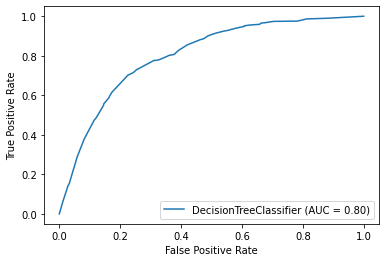

In [72]:
## Evaluating model on train set

predicted_val = clf.predict(xval)         # prediction on validation set

plot_roc_curve(clf,X =xval, y= yval)            # roc and auc curve

print(confusion_matrix(y_true = yval, y_pred = predicted_val))                # printing confusion matrix

print ('The F1-SCORE on the validation set prediction ',f1_score(y_true=yval,y_pred = predicted_val,sample_weight = yval))      # calculating F1 score

# Random Forest Model

In [73]:
from sklearn.ensemble import RandomForestClassifier         ## models from sklearn

In [74]:
#### Fitting a random forest classifier ######

clf = RandomForestClassifier()                          ## random forest function from  sklearn

params={'n_estimators':[50,70,100],                     ## number of trees combination i want
        'class_weight':['balanced'],                
        'criterion':['gini'],                           ## two different methods to find purity of node
        'max_depth':[3,4,5],                            ## depth combination
        'min_samples_split': [2,3,4,5],                 ## minimum number of samples must be there for occurence of a split
        'max_samples':[0.7,0.8,0.9],
        'max_features':[10,12,15,18,20]}                ## parameter combinations

In [75]:
grid_search = GridSearchCV(estimator = clf,param_grid = params,cv = 5,scoring = 'f1',return_train_score=True)

grid_search.fit(xtrain, ytrain)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              random_state=None, verbose=0,
                                   

In [76]:
grid_search.best_estimator_    ## printing best estimators

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=5, max_features=20,
                       max_leaf_nodes=None, max_samples=0.7,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [77]:
clf = grid_search.best_estimator_  

In [78]:
clf.fit(xtrain, ytrain)     ## training model with best estimators obtained from gridsearchcv

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=5, max_features=20,
                       max_leaf_nodes=None, max_samples=0.7,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

[[2209  730]
 [ 179  882]]
The F1-SCORE on the train set prediction  0.9078744209984559


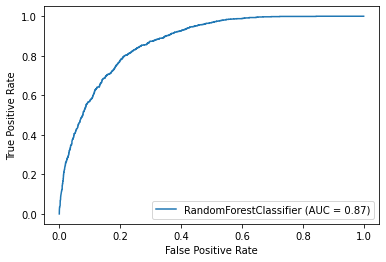

In [79]:
## Evaluating model on train set

predicted_train = clf.predict(xtrain)          # prediction on train set

plot_roc_curve(clf,X =xtrain, y= ytrain)         # roc and auc curve

print(confusion_matrix(y_true = ytrain, y_pred = predicted_train))      # printing confusion matrix

print ('The F1-SCORE on the train set prediction ',f1_score(y_true=ytrain,y_pred = predicted_train,sample_weight = ytrain))  # calculating F1 score

[[1614  621]
 [ 159  649]]
The F1-SCORE on the validation set prediction  0.8908716540837337


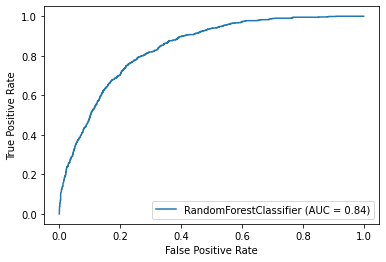

In [80]:
##**************** validation set *********************************

predicted_train = clf.predict(xval)     # prediction on validation set

plot_roc_curve(clf,X =xval, y= yval)      # roc and auc curve

print(confusion_matrix(y_true = yval, y_pred = predicted_train))       # printing confusion matrix

print ('The F1-SCORE on the validation set prediction ',f1_score(y_true=yval,y_pred = predicted_train,sample_weight = yval))      # calculating F1 score

In [81]:
### Calculating the feature importances ####

importances = clf.feature_importances_

columns = list(xtrain.columns)

importances_dict = {columns[i]: importances[i] for i in range(len(columns))}

importances_dict = dict(sorted(importances_dict.items(), key=lambda importances_dict: importances_dict[1],reverse=True))

In [82]:
importances_dict

{'Contract_Month-to-month': 0.3531416103566933,
 'Contract_One year': 0.035331041636867566,
 'Contract_Two year': 0.12335086779108285,
 'Dependents_No': 0.0018729401706792438,
 'Dependents_Yes': 0.0022067173746503025,
 'DeviceProtection_No internet service': 0.002377580598162851,
 'DeviceProtection_Yes': 0.0012023765733671248,
 'InternetService_Fiber optic': 0.08178580016984327,
 'InternetService_No': 0.005636031851657146,
 'MonthlyCharges': 0.07489361284554434,
 'MultipleLines_No phone service': 0.0030907471534545442,
 'MultipleLines_Yes': 0.0037542449257257616,
 'OnlineBackup_No internet service': 0.005927040585629861,
 'OnlineBackup_Yes': 0.00389768527963583,
 'OnlineSecurity_No internet service': 0.005745913614846407,
 'OnlineSecurity_Yes': 0.012435689750938577,
 'PaperlessBilling_No': 0.0058245785986297816,
 'PaperlessBilling_Yes': 0.00296182493051231,
 'Partner_No': 0.0011105692206075325,
 'Partner_Yes': 0.0017502447167310716,
 'PaymentMethod_Credit card (automatic)': 0.001674768

# XG Boost Model

In [83]:
from xgboost.sklearn import XGBClassifier     

In [84]:
from sklearn.model_selection import RandomizedSearchCV  

In [85]:
## trying with different parameters

xgb_params = {  
                "learning_rate":[0.01,0.05,0.1,0.3,0.5],
                "gamma":[i/10.0 for i in range(0,5)],
                "max_depth": [2,3,4,5,6,7,8],
                "min_child_weight":[1,2,5,10],
                "max_delta_step":[0,1,2,5,10],
                "subsample":[i/10.0 for i in range(5,10)],
                "colsample_bytree":[i/10.0 for i in range(5,10)],
                "colsample_bylevel":[i/10.0 for i in range(5,10)],
                "reg_lambda":[1e-5, 1e-2, 0.1, 1, 100], 
                "reg_alpha":[1e-5, 1e-2, 0.1, 1, 100],
                "scale_pos_weight":[1,2,3,4,5,6,7,8,9],
                "n_estimators":[100,500,700,1000]
             }

In [86]:
xgb=XGBClassifier(objective='binary:logistic')   ## binary classification 

In [87]:
n_iter=10

random_search=RandomizedSearchCV(xgb,n_jobs=-1,cv=10,n_iter=n_iter,scoring='roc_auc',
                                 param_distributions=xgb_params)

In [88]:
random_search.fit(xtrain,ytrain)    ## training the model with different parameters to obtain best set of parameters

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, s...
                                        'max_delta_step': [0, 1, 2, 5, 10],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8],
                         

In [89]:
## defining a function to get report means summary

def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.5f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [90]:
report(random_search.cv_results_,5)

Model with rank: 1
Mean validation score: 0.851 (std: 0.02325)
Parameters: {'subsample': 0.5, 'scale_pos_weight': 7, 'reg_lambda': 1, 'reg_alpha': 0.1, 'n_estimators': 100, 'min_child_weight': 10, 'max_depth': 8, 'max_delta_step': 0, 'learning_rate': 0.01, 'gamma': 0.0, 'colsample_bytree': 0.6, 'colsample_bylevel': 0.8}

Model with rank: 2
Mean validation score: 0.848 (std: 0.02106)
Parameters: {'subsample': 0.5, 'scale_pos_weight': 8, 'reg_lambda': 100, 'reg_alpha': 100, 'n_estimators': 700, 'min_child_weight': 2, 'max_depth': 7, 'max_delta_step': 10, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.9, 'colsample_bylevel': 0.7}

Model with rank: 3
Mean validation score: 0.848 (std: 0.02376)
Parameters: {'subsample': 0.8, 'scale_pos_weight': 5, 'reg_lambda': 0.1, 'reg_alpha': 0.1, 'n_estimators': 100, 'min_child_weight': 2, 'max_depth': 2, 'max_delta_step': 10, 'learning_rate': 0.3, 'gamma': 0.3, 'colsample_bytree': 0.8, 'colsample_bylevel': 0.5}

Model with rank: 4
Mean valid

In [91]:
random_search.best_estimator_   ## best estimators

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.0,
              learning_rate=0.01, max_delta_step=0, max_depth=8,
              min_child_weight=10, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0.1, reg_lambda=1, scale_pos_weight=7, seed=None,
              silent=None, subsample=0.5, verbosity=1)

In [92]:
xgbmodel = random_search.best_estimator_

In [93]:
from sklearn.model_selection import cross_val_score

In [94]:
cross_val_score(xgbmodel,xtrain,ytrain,scoring='roc_auc',verbose=10,n_jobs=-1,cv=10)    ## training with best obtained params and getting validation score

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.9s finished


array([0.8702028 , 0.81555641, 0.87941214, 0.82890515, 0.84997112,
       0.82287255, 0.85386985, 0.86535746, 0.83570787, 0.88625562])

In [98]:
## Validation scores

scores =[0.8702028 , 0.81555641, 0.87941214, 0.82890515, 0.84997112,
       0.82287255, 0.85386985, 0.86535746, 0.83570787, 0.88625562]

In [99]:
scores

[0.8702028,
 0.81555641,
 0.87941214,
 0.82890515,
 0.84997112,
 0.82287255,
 0.85386985,
 0.86535746,
 0.83570787,
 0.88625562]

# Questions & Answers

In [107]:
#1. Data cleaning including missing values, outliers and multi-collinearity.
#Ans: I converted the categorical variables into numerical variables (e.g. Yes/No to 1/0). Also i filled null values in total charges column with median. I ensured
#   that all the values are in numeric format.Then I created a new dataframe which consists of zeros and ones. The dataframe will have a one depending on the truth
#   of the categorical variables in this case. As some columns were having lower and higher numeric values, I scaled them down by using StandardScaler function from
#   sklearn library because irregular range of values can affect the performance of my model to some extent

In [108]:
#2. Describe your predictive churn model in elaboration.
#Ans:- 1.Environment and tools:
#   scikit-learn
#   numpy
#   pandas
#   matplotlib
#   seaborn

#   2.Description of variables in the dataset:
#   customerID:---------> Customer ID
#   gender:-------------> Whether the customer is a male or a female
#   SeniorCitizen:------> Whether the customer is a senior citizen or not (1, 0)
#   Partner:------------> Whether the customer has a partner or not (Yes, No)
#   Dependents:---------> Whether the customer has dependents or not (Yes, No)
#   tenure:-------------> Number of months the customer has stayed with the company
#   PhoneService:-------> Whether the customer has a phone service or not (Yes, No)
#   MultipleLines:------> Whether the customer has multiple lines or not (Yes, No, No phone service)
#   InternetService:----> Customer’s internet service provider (DSL, Fiber optic, No)
#   OnlineSecurity:-----> Whether the customer has online security or not (Yes, No, No internet service)
#   OnlineBackup:-------> Whether the customer has online backup or not (Yes, No, No internet service)
#   DeviceProtection:---> Whether the customer has device protection or not (Yes, No, No internet service)
#   TechSupport:--------> Whether the customer has tech support or not (Yes, No, No internet service)
#   StreamingTV:--------> Whether the customer has streaming TV or not (Yes, No, No internet service)
#   StreamingMovies:----> Whether the customer has streaming movies or not (Yes, No, No internet service)
#   Contract:-----------> The contract term of the customer (Month-to-month, One year, Two year)
#   PaperlessBilling:---> Whether the customer has paperless billing or not (Yes, No)
#   PaymentMethod:------> The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
#   MonthlyCharges:-----> The amount charged to the customer monthly
#   TotalCharges:-------> The total amount charged to the customer
#   Churn:--------------> Whether the customer churned or not (Yes or No)

#   3.Data Preprocessing:
#   I converted the categorical variables into numerical variables (e.g. Yes/No to 1/0). Also i filled null values in total charges column with median. I ensured
#   that all the values are in numeric format.Then I created a new dataframe which consists of zeros and ones. The dataframe will have a one depending on the truth
#   of the categorical variables in this case. As some columns were having lower and higher numeric values, I scaled them down using StandardScaler function from
#   sklearn library because irregular range of values can affect the performance of my model to some extent.Then, I split the dataset into features and target.

#   4. Model Data Preparation:
#   features object contains all the features that are used for making the predictions.
#   target object contains the outcomes that is whether or not the customer churned.
#   Next I used StratifiedShuffleSplit to split the data into training and validation sets with 43.20% of the data given to the validation set. The training set 
#   is used to train the model, while the validation set is only used to evaluate the model’s performance.

#   5. Random Forest Model:
#   I used GridSearchcv with various combination of parameters and after getting best set of parameter I used those parameters and with the help of 
#   random forest classifier trained the model with 50 trees and maximum depth of trees as 5.

#   6.Result:
#   The F1 score on traning set achieved is 0.9078744209984559 with AUC= 0.87 and F1 score on validation set achieved is 0.8908716540837337 with AUC= 0.84.

In [109]:
#3. How did you select variables to be included in the model?
#Ans: After the cleaning of data and converting all features into numeric values, correlation between features and targest is observed. If correlation among 
#   features is high then it leads to multi-collinearity which will affect the performace of model and those features should be dropped.If corelation between 
#   features and target is high, then those features are considered as good features. Hence, with the help of correlation matrix, we select good variables or
#   features.

In [110]:
#4. Demonstrate the performance of the model by using best set of tools.
#Ans:- I have demonstrated the performance of model with different algorithms like Logistic Regression, decision trees, Random Forest and XGBoost. After seeing
#      no improvement in model, I have finalised Random Forest model because of its capacity to prevent overfitting and giving low bias and low variance.
#      All the details regarding performance of various models are given in Summary section below.

In [111]:
#5. What are the key factors that predict customer churn?
#Ans:- The key factors that predict customer churn are : 
#      1.Dependents: Many (82.56%) people were not having dependents.
#      2.Online Security: Many (78.17%) people were not having online security.
#      3.Tech Support: Many (77.37%) people were not having tech support service.
#      4.Contract: Many (88.55%) people were having month-to-month contract.
# Solution:-
data2 = pd.read_excel('Churn.xlsx')
newdf = data2.loc[data['Churn']=='Yes']
print(newdf['Dependents'].value_counts())
print('The percent of people not having dependents is :', ((1543/1869)*100))
print('*************************************************************************************')
print(newdf['OnlineSecurity'].value_counts())
print('The percent of people not having online security is :', ((1461/1869)*100))
print('*************************************************************************************')
print(newdf['TechSupport'].value_counts())
print('The percent of people not having tech support is :', ((1446/1869)*100))
print('*************************************************************************************')
print(newdf['Contract'].value_counts())
print('The percent of people having month-to-month contract is :', ((1655/1869)*100))

No     1543
Yes     326
Name: Dependents, dtype: int64
The percent of people not having dependents is : 82.55751738897807
*************************************************************************************
No                     1461
Yes                     295
No internet service     113
Name: OnlineSecurity, dtype: int64
The percent of people not having online security is : 78.1701444622793
*************************************************************************************
No                     1446
Yes                     310
No internet service     113
Name: TechSupport, dtype: int64
The percent of people not having tech support is : 77.36757624398074
*************************************************************************************
Month-to-month    1655
One year           166
Two year            48
Name: Contract, dtype: int64
The percent of people having month-to-month contract is : 88.55002675227395


In [112]:
#6. Do these factors make sense? If yes, How? If not, How not?
#Ans:- Yes, it make sense except Dependents because having or not having dependents is not under company's control. But not having online
#      security can affect the customer's privacy. Also, not having good tech support can let feel the customers helpless which made customers
#      to make month-to-month contract with company which shows lack of trust of customers towards company. As a result,negative mindset of
#      people created towards company which lead to customer churn.

In [113]:
#7. What kind of offers should be avail to customers to encourage them to remain with company?
#Ans:- The following changes and offers can be given to customers in order to encourage them to remain with company:
#      1.Company should hire more cyber security professionals and should open tech support 24/7 for all.
#      2.The margin profit of product can be reduced.
#      3.Discount offers on long tern contract can be given.
#      4.Longer the contract, higher the discount.

In [114]:
#8. Assuming these actions have been implemented, how would you determine if they work?
#Ans:- 1.By collecting the data of some months after the offers, we can see that the graph of number of customers churn declining because 
#      services and security are given at minimal rate along with long contract offers are given.
#      2.Customers having long term contracts will increase.
#      3.Company can also ask for reviews with the help of either email (consisting of star rating and reviews) or call from tech support. 
#      Higher positive reviews means higher satisfaction of customers.

# Working Of Model (Simplified Manner)

**Introduction** : 
In the Machine Learning world, Random Forest models are a kind of non 
parametric models that can be used both for regression and classification. They are one of the most popular ensemble methods (Ensemble method is a machine learning technique that combines several base models in order to produce one optimal predictive model), belonging to the specific category of Bagging methods(it is a simple and very powerful ensemble method).                         
**Working Procedure :**                                     
*Step 1 : Training the model.*                  
1.We create a bootstrapped data set for each tree. (Bootstrapping is a statistical procedure that resamples a single dataset to create many simulated samples).                
2.Then we create a decision tree using its corresponding data set, but at each node use a random sub sample of variables or features to split on. (Decision tree is a Machine Learning Algorithm which involves in making a tree shaped diagram to analyse the data which breaks into different branches to make predictions and give statistical probability and those branches are called nodes).         
3.Repeat all these three steps hundreds of times to build a massive forest with a wide variety of trees. This variety is what makes a Random Forest way better than a single decision tree.                        
*Step 2: Making predictions.*             
After model gets trained, making predictions with a Random Forest is very easy. We just have to take each of our individual trees, pass the observation for which we want to make a prediction through them, get a prediction from every tree and then obtain an overall, aggregated (average) prediction. 

**Conclusion:**                         
Random Forests are very flexible and powerful Machine Learning models that are highly used in commercial and industrial applications, along with Boosting models and Artificial Neural Networks.

# Summary

**Logistic Model** --> 
Train score : 0.8919060052219322 and AUC= 0.85.                        
Validation score : 0.8885832187070152 and AUC= 0.84.

**Decision Tree Model**-->
Train score : 0.8976623376623376 and AUC= 0.84.                                
Validation score : 0.8738675958188153 and AUC= 0.80.

**Random Forest Model**-->
Train score : 0.9078744209984559 and AUC= 0.87.                                 
Validation score : 0.8908716540837337 and AUC= 0.84.

**XGBoost Model**--> 
Best Cross Validation score : 0.88625562.

***Conclusion:***
As the improvement of model is not so much, we can finalise the Random Forest Model.